<a href="https://colab.research.google.com/github/Griffinw15/DS-Unit-1-Sprint-2-Statistics/blob/master/module2/LS_DS_123_Introduction_to_Bayesian_InfeLS_DS_122_Sampling_Confidence_Intervals_and_Hypothesis_Testing_Assignment.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

## Assignment - Build a confidence interval

A confidence interval refers to a neighborhood around some point estimate, the size of which is determined by the desired p-value. For instance, we might say that 52% of Americans prefer tacos to burritos, with a 95% confidence interval of +/- 5%.

52% (0.52) is the point estimate, and +/- 5% (the interval $[0.47, 0.57]$) is the confidence interval. "95% confidence" means a p-value $\leq 1 - 0.95 = 0.05$.

In this case, the confidence interval includes $0.5$ - which is the natural null hypothesis (that half of Americans prefer tacos and half burritos, thus there is no clear favorite). So in this case, we could use the confidence interval to report that we've failed to reject the null hypothesis.

But providing the full analysis with a confidence interval, including a graphical representation of it, can be a helpful and powerful way to tell your story. Done well, it is also more intuitive to a layperson than simply saying "fail to reject the null hypothesis" - it shows that in fact the data does *not* give a single clear result (the point estimate) but a whole range of possibilities.

How is a confidence interval built, and how should it be interpreted? It does *not* mean that 95% of the data lies in that interval - instead, the frequentist interpretation is "if we were to repeat this experiment 100 times, we would expect the average result to lie in this interval ~95 times."

For a 95% confidence interval and a normal(-ish) distribution, you can simply remember that +/-2 standard deviations contains 95% of the probability mass, and so the 95% confidence interval based on a given sample is centered at the mean (point estimate) and has a range of +/- 2 (or technically 1.96) standard deviations.

Different distributions/assumptions (90% confidence, 99% confidence) will require different math, but the overall process and interpretation (with a frequentist approach) will be the same.

Your assignment - using the data from the prior module ([congressional voting records](https://archive.ics.uci.edu/ml/datasets/Congressional+Voting+Records)):


### Confidence Intervals:
1. Generate and numerically represent a confidence interval
2. Graphically (with a plot) represent the confidence interval
3. Interpret the confidence interval - what does it tell you about the data and its distribution?

### Chi-squared tests:
4. Take a dataset that we have used in the past in class that has **categorical** variables. Pick two of those categorical variables and run a chi-squared tests on that data
  - By hand using Numpy
  - In a single line using Scipy


In [0]:
import pandas as pd
import numpy as np 
from scipy import stats
import matplotlib.pyplot as plt

df = pd.read_csv("https://archive.ics.uci.edu/ml/machine-learning-databases/voting-records/house-votes-84.data", names=['party','handicapped-infants','water-project',
                          'budget','physician-fee-freeze', 'el-salvador-aid',
                          'religious-groups','anti-satellite-ban',
                          'aid-to-contras','mx-missile','immigration',
                          'synfuels', 'education', 'right-to-sue','crime','duty-free',
                          'south-africa'])

In [0]:
df = df.replace({"y":1, "n":0, "?":np.NaN})

In [0]:
rep = df[df['party']=='republican']
dem = df[df['party']=='democrat']

In [5]:
df['party'].value_counts()

democrat      267
republican    168
Name: party, dtype: int64

In [6]:
df.head()

,party,handicapped-infants,water-project,budget,physician-fee-freeze,el-salvador-aid,religious-groups,anti-satellite-ban,aid-to-contras,mx-missile,immigration,synfuels,education,right-to-sue,crime,duty-free,south-africa
0,republican,0.0,1.0,0.0,1.0,1.0,1.0,0.0,0.0,0.0,1.0,NaN,1.0,1.0,1.0,0.0,1.0
1,republican,0.0,1.0,0.0,1.0,1.0,1.0,0.0,0.0,0.0,0.0,0.0,1.0,1.0,1.0,0.0,NaN
2,democrat,NaN,1.0,1.0,NaN,1.0,1.0,0.0,0.0,0.0,0.0,1.0,0.0,1.0,1.0,0.0,0.0
3,democrat,0.0,1.0,1.0,0.0,NaN,1.0,0.0,0.0,0.0,0.0,1.0,0.0,1.0,0.0,0.0,1.0
4,democrat,1.0,1.0,1.0,0.0,1.0,1.0,0.0,0.0,0.0,0.0,1.0,NaN,1.0,1.0,1.0,1.0


In [0]:
sample1 = df['water-project'].sample(50)

In [0]:
# Generate confidence interval (numerically represented)
def mean_moe(sample, confidence=0.95):
  sample=np.array(sample)
  mean=np.nanmean(sample)
  n=len(sample)
  stderr=np.nanstd(sample, ddof=1) / np.sqrt(n)
  t=stats.t.ppf((1 + confidence)/2.0, n - 1)
  margin_of_error = t * stderr
  return mean, margin_of_error

In [9]:
mean_moe(sample1)

(0.5531914893617021, 0.14281957761528427)

Text(0.5, 1.0, 'Bipartisan Confidence Interval for Water Project')

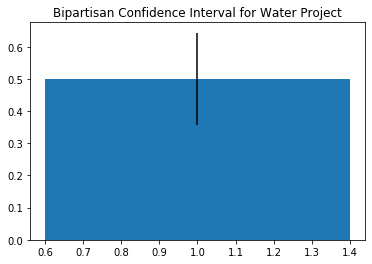

In [10]:
plt.bar(x=1, height=0.5, yerr=0.14382089563277836)

plt.title('Bipartisan Confidence Interval for Water Project')

interpret:

Tells you vote was split pretty even(mean=.5)

Null hypothesis: split vote(mean=.5)

Alt hypothesis: it was not an even split vote

Fail to reject hypothesis

95/100 times running test, mean is in given range(.36-.64)

In [17]:
#part two:chi squared w two variables
#null:variables are independent 
#alt:variables are dependent
#confidence level:95%
df = pd.read_csv('https://archive.ics.uci.edu/ml/machine-learning-databases/breast-cancer/breast-cancer.data', names=['class','age','menopause','tumor_size','inv_nodes','node_caps','deg_malig','breast','breast_quad','irradiat'], na_values=" ?")
print(df.shape)
df.head()

(286, 10)


,class,age,menopause,tumor_size,inv_nodes,node_caps,deg_malig,breast,breast_quad,irradiat
0,no-recurrence-events,30-39,premeno,30-34,0-2,no,3,left,left_low,no
1,no-recurrence-events,40-49,premeno,20-24,0-2,no,2,right,right_up,no
2,no-recurrence-events,40-49,premeno,20-24,0-2,no,2,left,left_low,no
3,no-recurrence-events,60-69,ge40,15-19,0-2,no,2,right,left_up,no
4,no-recurrence-events,40-49,premeno,0-4,0-2,no,2,right,right_low,no


In [18]:
df.describe(exclude='number')

,class,age,menopause,tumor_size,inv_nodes,node_caps,breast,breast_quad,irradiat
count,286,286,286,286,286,286,286,286,286
unique,2,6,3,11,7,3,2,6,2
top,no-recurrence-events,50-59,premeno,30-34,0-2,no,left,left_low,no
freq,201,96,150,60,213,222,152,110,218


In [20]:
df['breast'].value_counts()

left     152
right    134
Name: breast, dtype: int64

In [21]:
df['age'].value_counts()

50-59    96
40-49    90
60-69    57
30-39    36
70-79     6
20-29     1
Name: age, dtype: int64

In [22]:
contingency_table = pd.crosstab(df['age'], df['breast'], margins=True)

contingency_table

breast,left,right,All
age,,,
20-29,0,1,1
30-39,21,15,36
40-49,41,49,90
50-59,56,40,96
60-69,30,27,57
70-79,4,2,6
All,152,134,286


In [23]:
chi2, p_value, dof, expected = stats.chi2_contingency(contingency_table)

print(f"Chi-Squared: {chi2}")
print(f"P-value: {p_value}")
print(f"Degrees of Freedom: {dof}") 
print("Expected: \n", np.array(expected))

Chi-Squared: 5.089632458666961
P-value: 0.9549179188774608
Degrees of Freedom: 12
Expected: 
 [[  0.53146853   0.46853147   1.        ]
 [ 19.13286713  16.86713287  36.        ]
 [ 47.83216783  42.16783217  90.        ]
 [ 51.02097902  44.97902098  96.        ]
 [ 30.29370629  26.70629371  57.        ]
 [  3.18881119   2.81118881   6.        ]
 [152.         134.         286.        ]]


In [0]:
#based on chi^statistic of 5.08, and a p-value of 0.954, I fail to reject 

In [24]:
contingency_table

breast,left,right,All
age,,,
20-29,0,1,1
30-39,21,15,36
40-49,41,49,90
50-59,56,40,96
60-69,30,27,57
70-79,4,2,6
All,152,134,286


In [25]:
row_sums = contingency_table.iloc[0:6, 2].values
col_sums = contingency_table.iloc[6, 0:2].values

print(row_sums)
print(col_sums)

[ 1 36 90 96 57  6]
[152 134]


In [0]:
total_total = 286

In [27]:
expected = []
for i in range(len(row_sums)):
  expected_row = []
  for column in col_sums:
    expected_val = column*row_sums[i]/total_total
    expected_row.append(expected_val)
  expected.append(expected_row)

expected = np.array(expected)
print(expected)

[[ 0.53146853  0.46853147]
 [19.13286713 16.86713287]
 [47.83216783 42.16783217]
 [51.02097902 44.97902098]
 [30.29370629 26.70629371]
 [ 3.18881119  2.81118881]]


In [28]:
observed = pd.crosstab(df['age'], df['breast']).values
print(observed.shape)
observed

(6, 2)


array([[ 0,  1],
       [21, 15],
       [41, 49],
       [56, 40],
       [30, 27],
       [ 4,  2]])

In [29]:
chi_squared = ((observed - expected)**2/(expected)).sum() 
print(f"Chi-Squared: {chi_squared}")

Chi-Squared: 5.089632458666961


## Stretch goals:

1. Write a summary of your findings, mixing prose and math/code/results. *Note* - yes, this is by definition a political topic. It is challenging but important to keep your writing voice *neutral* and stick to the facts of the data. Data science often involves considering controversial issues, so it's important to be sensitive about them (especially if you want to publish).
2. Apply the techniques you learned today to your project data or other data of your choice, and write/discuss your findings here.
3. Refactor your code so it is elegant, readable, and can be easily run for all issues.

## Resources

- [Interactive visualize the Chi-Squared test](https://homepage.divms.uiowa.edu/~mbognar/applets/chisq.html)
- [Calculation of Chi-Squared test statistic](https://en.wikipedia.org/wiki/Pearson%27s_chi-squared_test)
- [Visualization of a confidence interval generated by R code](https://commons.wikimedia.org/wiki/File:Confidence-interval.svg)
- [Expected value of a squared standard normal](https://math.stackexchange.com/questions/264061/expected-value-calculation-for-squared-normal-distribution) (it's 1 - which is why the expected value of a Chi-Squared with $n$ degrees of freedom is $n$, as it's the sum of $n$ squared standard normals)